# Pre-Visualization

### Read Pre-Processed data

In [1]:
import pandas as pd
import numpy as np
#  Index 0 represents the award number which is unique to each document 
docs2vec = pd.read_csv('docs_vector.csv', index_col = 0, header=None)
#docs2vec.set_index(docs2vec.columns[0])
print('Data Shape: ', docs2vec.shape)
docs2vec.head()

Data Shape:  (49074, 300)


,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
9254293.0,-0.069380,0.043574,-0.000726,0.048484,-0.025510,0.006262,-0.036216,-0.022857,-0.020438,0.010014,...,0.029088,0.003316,-0.036513,0.029949,-0.013912,-0.062233,-0.043268,-0.008448,-0.042122,0.056087
9254046.0,-0.068804,0.047289,-0.004199,0.047923,-0.023679,0.008813,-0.034846,-0.021046,-0.021554,0.008313,...,0.028636,0.000343,-0.039810,0.032698,-0.010946,-0.064177,-0.043474,-0.011102,-0.042165,0.058833
9254708.0,-0.064731,0.041257,-0.002079,0.050523,-0.021690,0.010098,-0.031933,-0.018337,-0.019479,0.010856,...,0.027773,0.001253,-0.037309,0.031383,-0.012615,-0.061032,-0.041807,-0.008018,-0.043039,0.055232
9254085.0,-0.065514,0.047664,-0.003868,0.048916,-0.019847,0.009603,-0.032904,-0.015890,-0.018976,0.007979,...,0.026406,-0.002981,-0.041753,0.033225,-0.010989,-0.062158,-0.039481,-0.008778,-0.039722,0.055824
9254330.0,-0.068589,0.048235,-0.003841,0.049804,-0.022346,0.009306,-0.033885,-0.017681,-0.017290,0.007400,...,0.026265,-0.001228,-0.040819,0.032922,-0.012522,-0.064146,-0.039414,-0.011086,-0.039173,0.058802


### Data Normalization

In [2]:
# from sklearn import preprocessing
# df = preprocessing.normalize(docs2vec, norm='l2', axis=1, copy=False, return_norm=False)
# df = pd.DataFrame(df)
# print('Data Shape: ', df.shape)
# df.head()

### PCA Decomposition for 2D pre-visualization

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(docs2vec)
print('Variation Ratio: ', pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.set_index(docs2vec.index,inplace=True)
print('Data shape: ', principalDf.shape)
principalDf.head()

Variation Ratio:  [0.22646793 0.13580476]
Data shape:  (49074, 2)


,pc1,pc2
0,,
9254293.0,0.014243,-0.006449
9254046.0,-0.009191,-0.002264
9254708.0,0.013431,-0.004799
9254085.0,-0.010991,0.018573
9254330.0,-0.009560,0.021950


### Pre-Visualization: All Points

All data visulization after 2-component principal component decomposition.

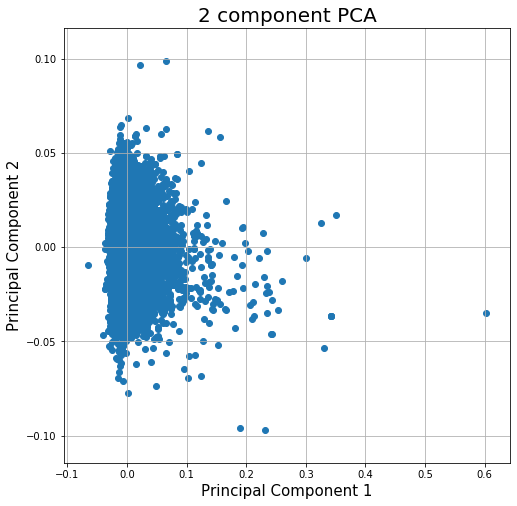

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['pc1'], principalDf['pc2'])
ax.grid()
plt.show()

These outlier points corresponds to not ture abstract. <br>
Example Abstracts: <br>
    9401662:  Bhowmik    This is an Individual Travel award.  ***' <br>
    9254516: NNNNNNNNNNNNNNNNNNN//

In [5]:
principalDf_Outlier = principalDf[(principalDf['pc1'] > 0.25) | (principalDf['pc2'] < -0.075) | (principalDf['pc2'] > 0.075)]
print(principalDf_Outlier)

                pc1       pc2
0                            
9254516.0  0.601818 -0.035106
9252605.0  0.021598  0.096890
9417988.0  0.324703  0.012575
9400192.0  0.342002 -0.036687
9401662.0  0.188964 -0.095735
9355771.0  0.299530 -0.006020
9313269.0  0.349852  0.017075
9313839.0  0.259327 -0.017730
9315155.0  0.342002 -0.036687
9315089.0  0.342002 -0.036687
9312030.0  0.329727 -0.053656
9316234.0  0.342002 -0.036687
9318322.0  0.232119 -0.097058
9318321.0  0.253980 -0.033251
9153716.0  0.066292  0.098928
9047965.0  0.001473 -0.077489


### Remove outliers

In [6]:
print(principalDf_Outlier.index)

Float64Index([9254516.0, 9252605.0, 9417988.0, 9400192.0, 9401662.0, 9355771.0,
              9313269.0, 9313839.0, 9315155.0, 9315089.0, 9312030.0, 9316234.0,
              9318322.0, 9318321.0, 9153716.0, 9047965.0],
             dtype='float64', name=0)


In [7]:
principalDf_final = principalDf.drop(index=principalDf_Outlier.index)

### Pre-Visualization: Sample Points

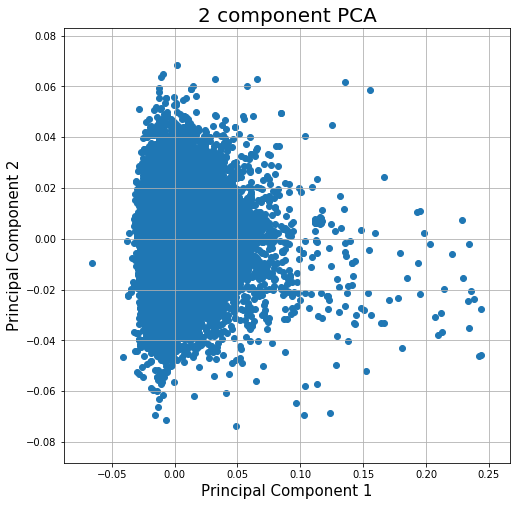

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf_final['pc1'], principalDf_final['pc2'])
ax.grid()
plt.show()

Sample data n = 1000 visulization after 2-component principal component decomposition.

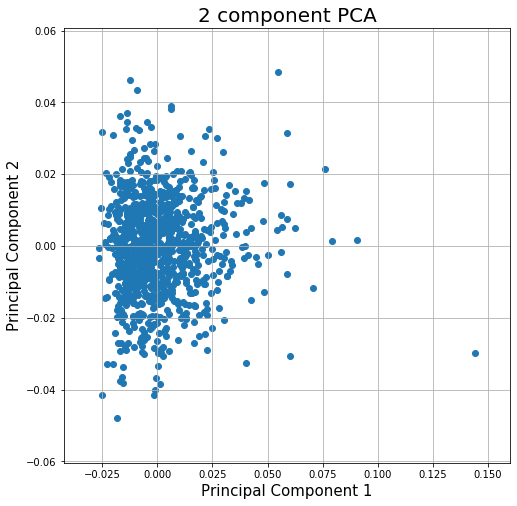

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

principalDf_sample = principalDf_final.sample(n =1000)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#plt.xlim([-0.05, 0.1])
#plt.ylim([-0.05, 0.1])
ax.scatter(principalDf_sample['pc1'], principalDf_sample['pc2'])
ax.grid()
plt.show()

## Remove outlier and write the final version of the file
'docs_vector_final.csv'

In [10]:
df = docs2vec.drop(index=principalDf_Outlier.index)

In [11]:
df.to_csv('docs_vector_final.csv',header=None)